In [2]:
#working on the diabetics prediction
#import the necessary libraries needed for the prediction
#!pip install seaborn
!pip install matplotlib
import pandas as pd
import numpy as np                      #-------if we dont any any libraries we need to install them
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#here im importing the dataset 
df=pd.read_csv("Data Set - Diabetes.csv")
df      #----- printing the dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
k=df.columns
print("The number of columns/features in the dataset:",len(k))
print("\nThe features are",k)
print("\nThe shape of the given Dataset is",df.shape)

The number of columns/features in the dataset: 9

The features are Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

The shape of the given Dataset is (768, 9)


In [5]:
#here im doing the data preprocessing things
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
df.isnull()#---- we calculate  the null values count in next section


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
763,False,False,False,False,False,False,False,False,False
764,False,False,False,False,False,False,False,False,False
765,False,False,False,False,False,False,False,False,False
766,False,False,False,False,False,False,False,False,False


In [7]:
df.isnull().sum()  # no null values in the dataset

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [8]:


df.describe()    #we observe that all the value have correct data values 
                 #our dataset is perfectly okay to move further



,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [10]:

df.corr().Outcome  # here we checking the correlation of outcome with all other features


Pregnancies                 0.221898
Glucose                     0.466581
BloodPressure               0.065068
SkinThickness               0.074752
Insulin                     0.130548
BMI                         0.292695
DiabetesPedigreeFunction    0.173844
Age                         0.238356
Outcome                     1.000000
Name: Outcome, dtype: float64

In [11]:

df.corr().BloodPressure  # here we checking the correlation of BloodPressure with all other features


Pregnancies                 0.141282
Glucose                     0.152590
BloodPressure               1.000000
SkinThickness               0.207371
Insulin                     0.088933
BMI                         0.281805
DiabetesPedigreeFunction    0.041265
Age                         0.239528
Outcome                     0.065068
Name: BloodPressure, dtype: float64

***correlation_heatmap***


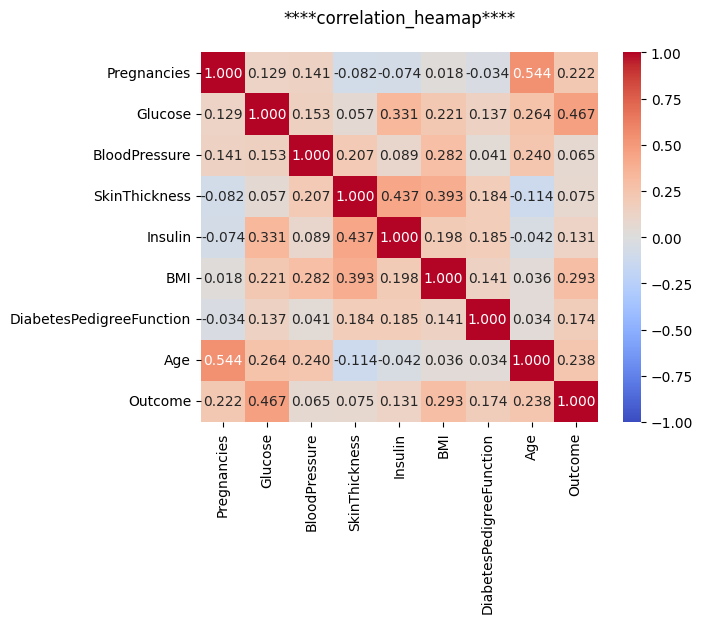

In [16]:
#here we are going to see the correlation between every  pair of feature

# plot the heatmap
print("***correlation_heatmap***")
sns.heatmap(df.corr(),vmin=-1,vmax=1,annot=True,cmap="coolwarm",fmt='.3f')
plt.title('****correlation_heamap****\n')
plt.show()









In [17]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


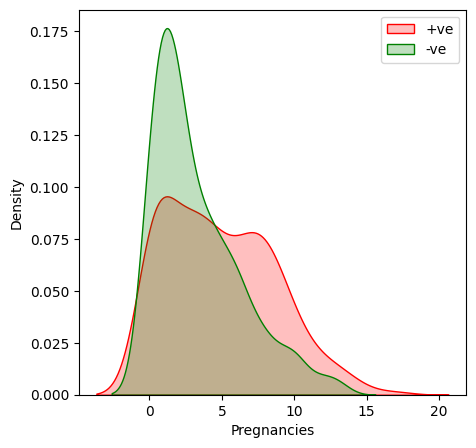

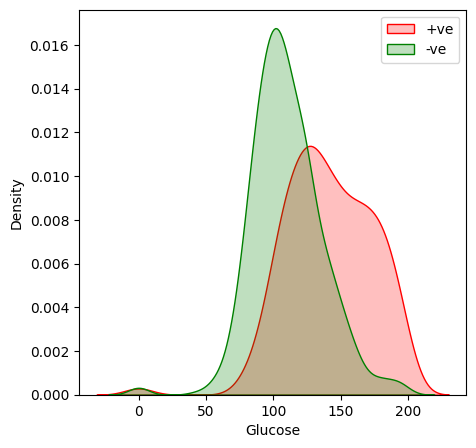

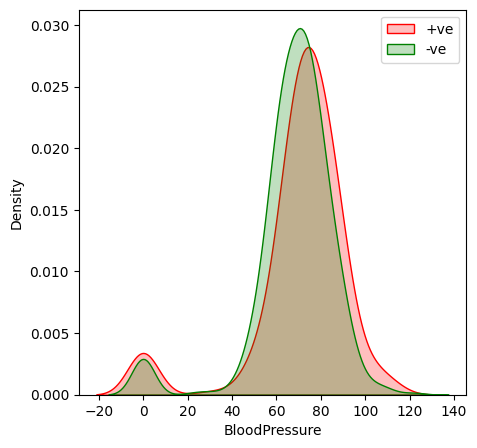

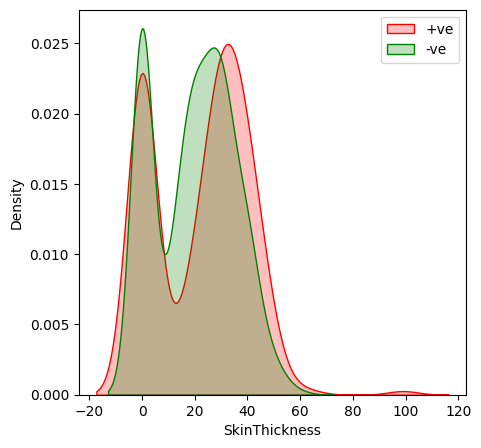

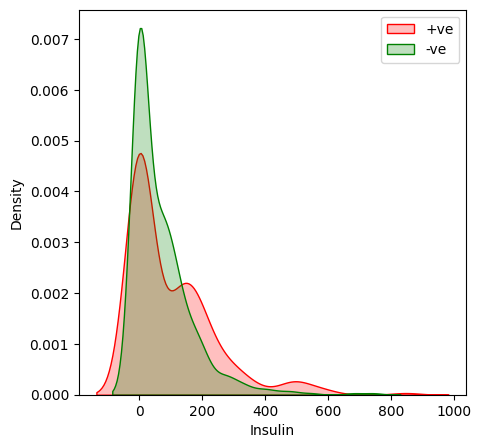

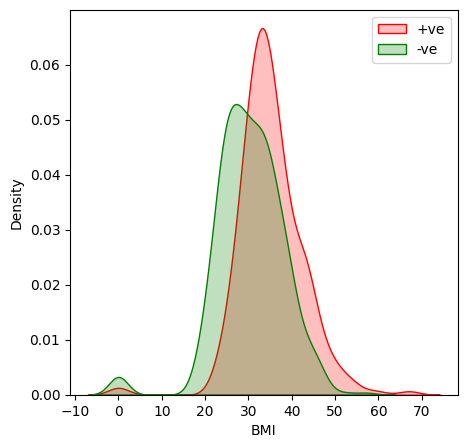

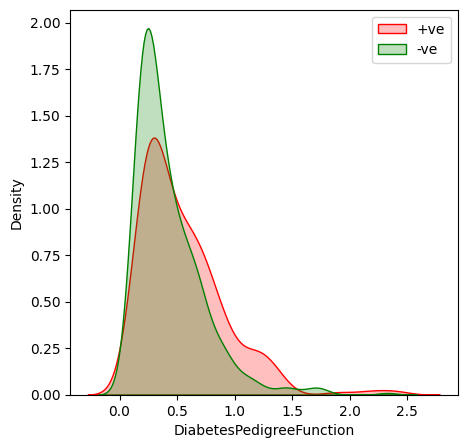

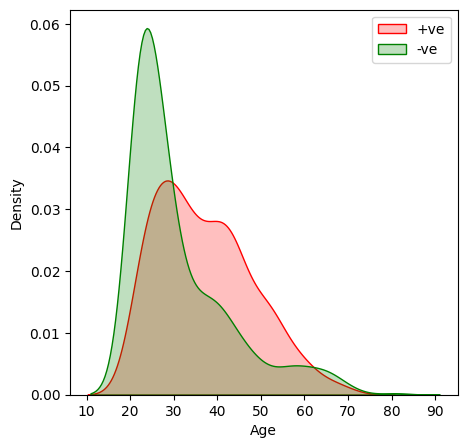

In [18]:
#working with the each feature and target variable  by the density function
k1=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age',]
for i in k1:
    plt.figure(figsize=(5,5))
    kde=sns.kdeplot(df[i][df["Outcome"]==1],fill=True,color='red')
    kde=sns.kdeplot(df[i][df["Outcome"]==0],fill=True,color='green')
    kde.set_xlabel(i)
    kde.set_ylabel("Density")
    kde.legend(["+ve",'-ve'])




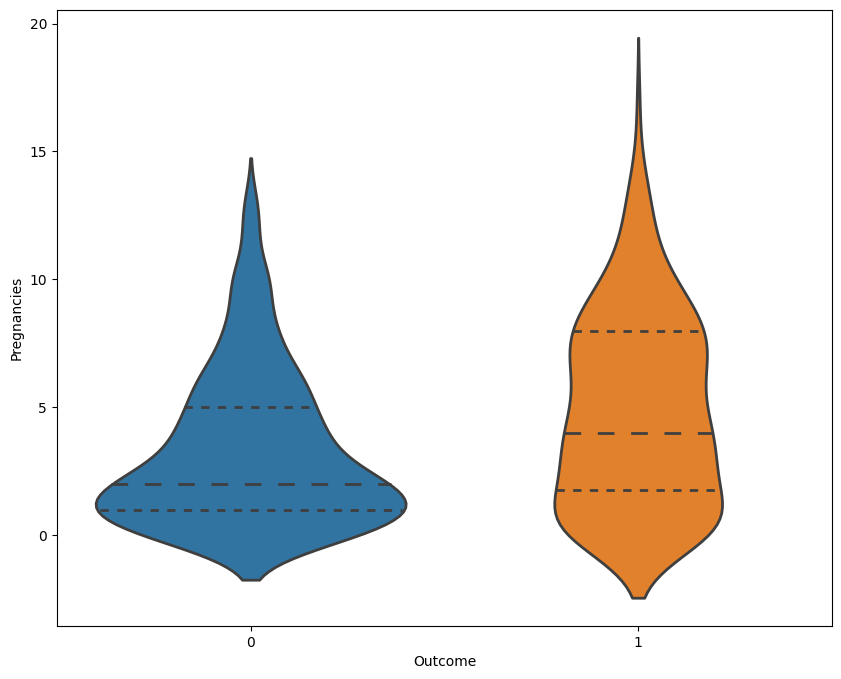

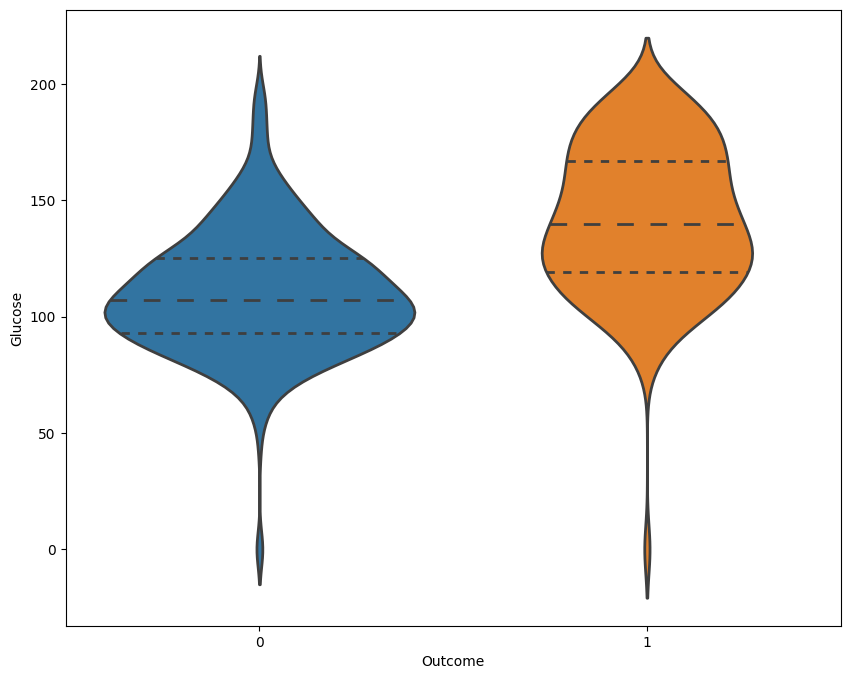

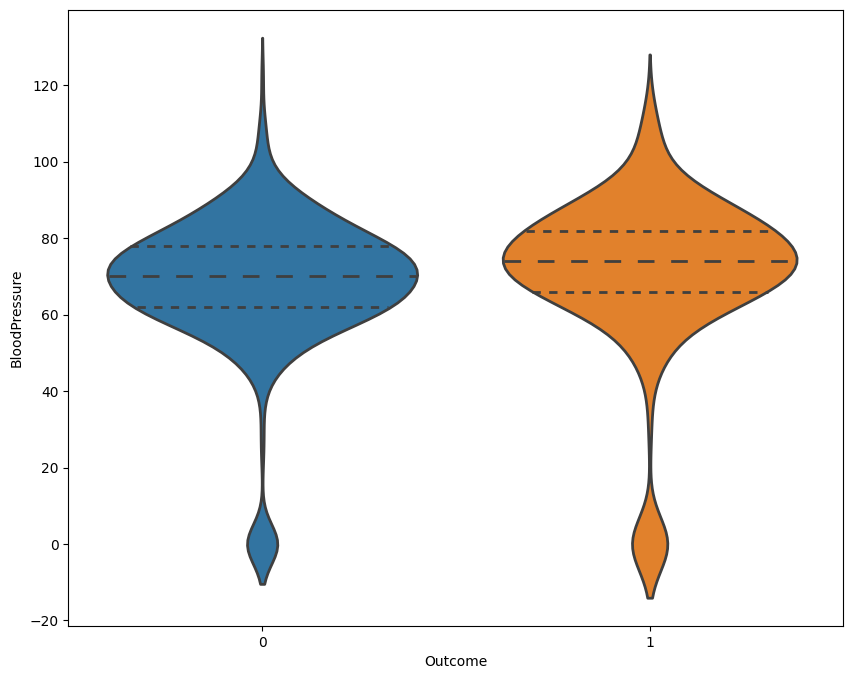

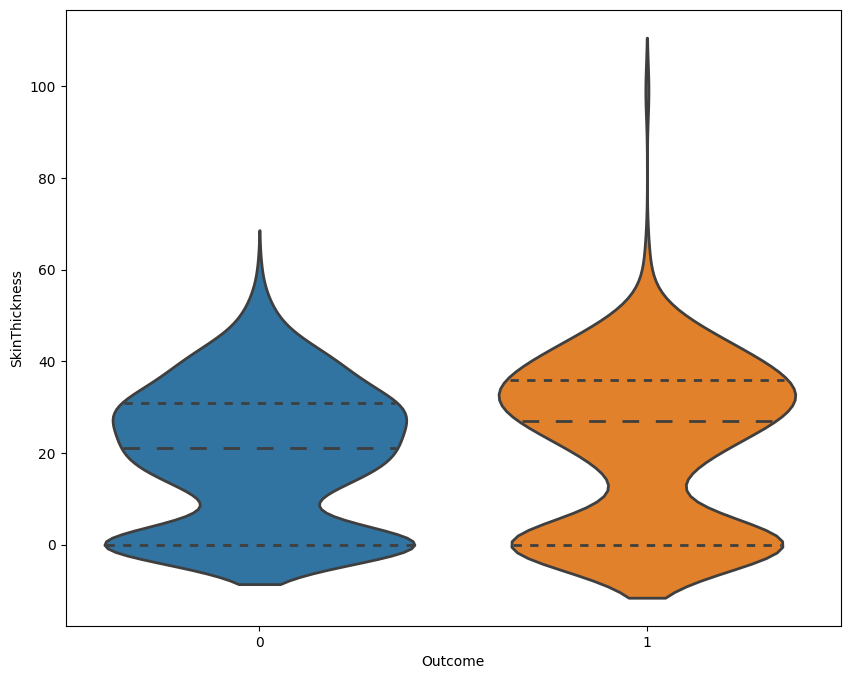

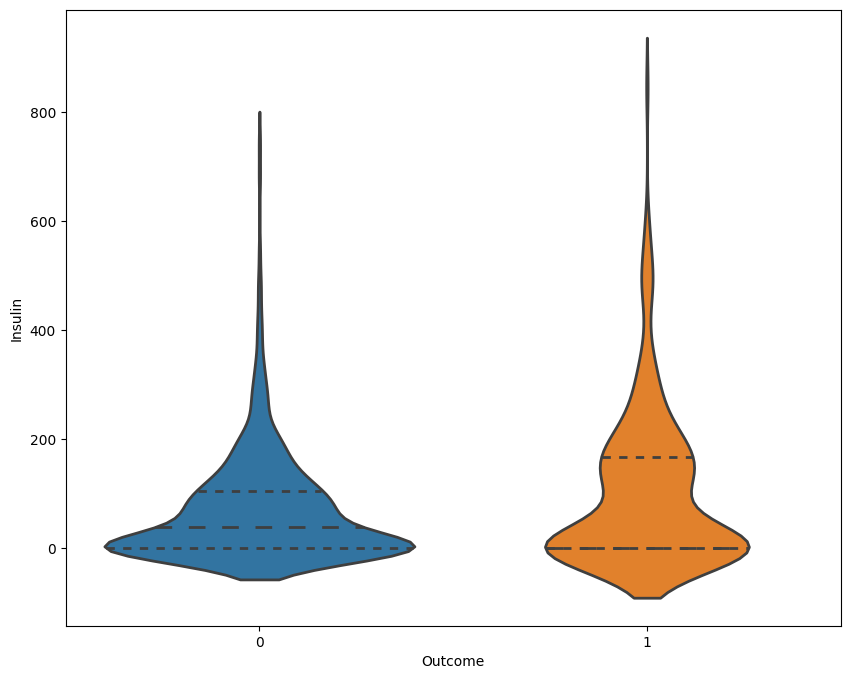

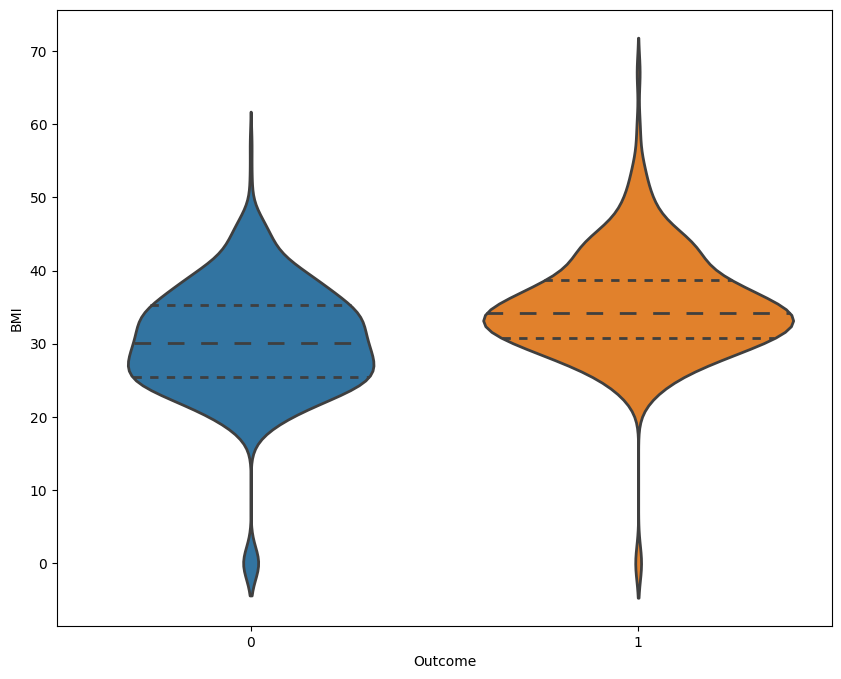

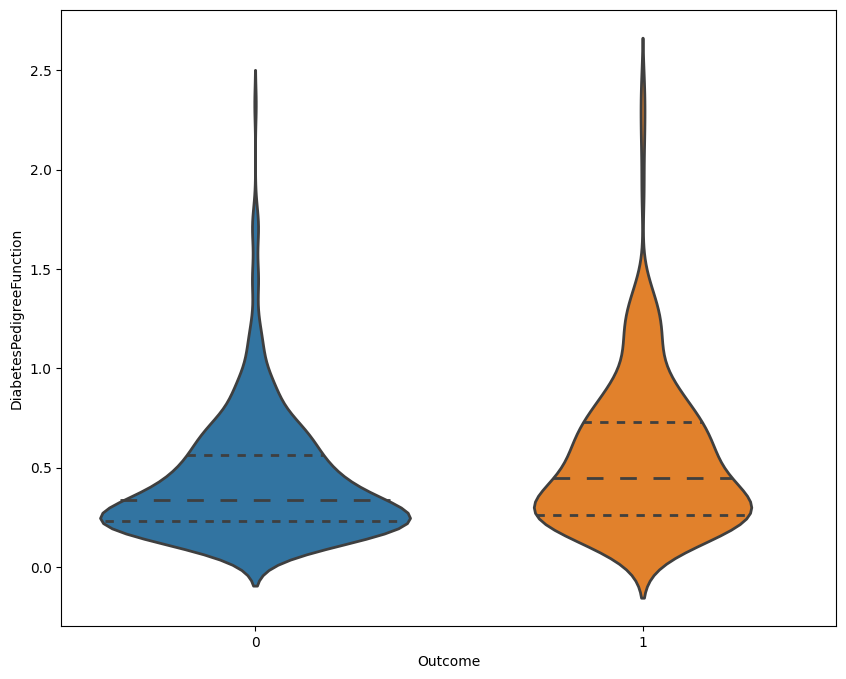

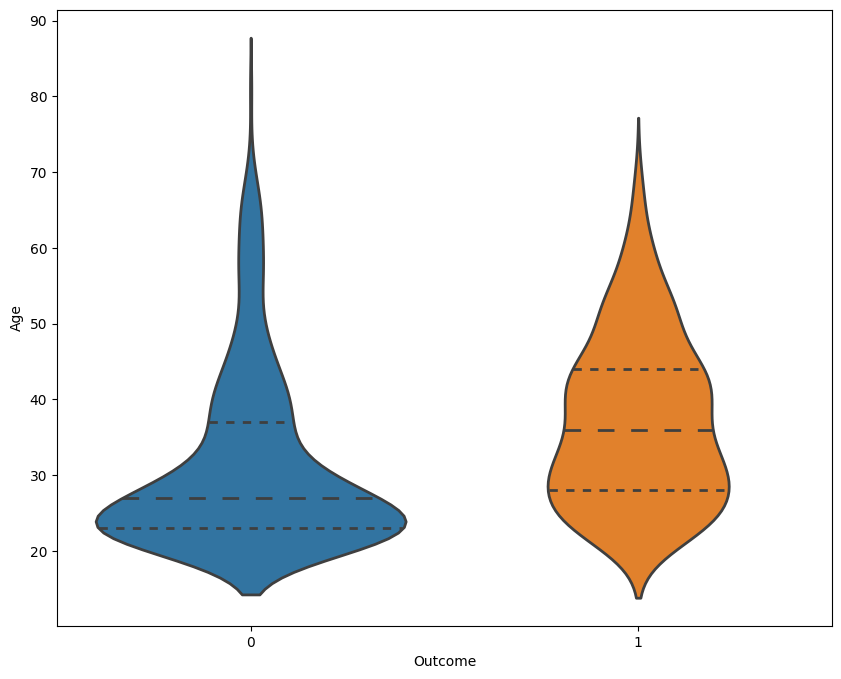

In [19]:
# HERE WE are going to see the violin graph for each feature and the target variable
for i in k1:
    plt.figure(figsize=(10,8))
    sns.violinplot(data=df,x="Outcome",y=i,split=True,linewidth=2,inner="quart")

In [236]:
#until above we have done the vizuzlizing the dataset
#next we will do some preprocessing the to get the better accuracy

In [20]:
#here we try to replace the zero values in the dataset with the statistics values
for i in k1:
    df[i]=df[i].replace(0,df[i].mean())
print("                                 ***THE NEW DATASET IS***")
df


                                 ***THE NEW DATASET IS***


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.000000,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1.000000,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,8.000000,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,1.000000,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,3.845052,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10.000000,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
764,2.000000,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
765,5.000000,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
766,1.000000,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


In [21]:
#model creation by using the different types of classification algortithms and checking the accuracy of them..
#spliting the dependent and independent variables from the dataset
x=df.drop("Outcome",axis=1)
y=df["Outcome"]


In [22]:
#splitting the dataset into the tainging and testing data
#!pip install -U scikit-learn

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=40)
print("                         *****x_train values:****")
x_train



                         *****x_train values:****


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
402,5.000000,136.0,84.000000,41.000000,88.000000,35.0,0.286,35
748,3.000000,187.0,70.000000,22.000000,200.000000,36.4,0.408,36
606,1.000000,181.0,78.000000,42.000000,293.000000,40.0,1.258,22
253,3.845052,86.0,68.000000,32.000000,79.799479,35.8,0.238,25
361,5.000000,158.0,70.000000,20.536458,79.799479,29.8,0.207,63
...,...,...,...,...,...,...,...,...
440,3.845052,189.0,104.000000,25.000000,79.799479,34.3,0.435,41
165,6.000000,104.0,74.000000,18.000000,156.000000,29.9,0.722,41
7,10.000000,115.0,69.105469,20.536458,79.799479,35.3,0.134,29
219,5.000000,112.0,66.000000,20.536458,79.799479,37.8,0.261,41


In [23]:
print("*****y_train values:****")
y_train

*****y_train values:****


402    1
748    1
606    1
253    0
361    0
      ..
440    1
165    1
7      0
219    1
326    1
Name: Outcome, Length: 537, dtype: int64

In [24]:
print("           *****x_test values:****")
x_test

           *****x_test values:****


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
370,3.000000,173.0,82.0,48.0,465.000000,38.4,2.137,25
388,5.000000,144.0,82.0,26.0,285.000000,32.0,0.452,58
611,3.000000,174.0,58.0,22.0,194.000000,32.9,0.593,36
550,1.000000,116.0,70.0,28.0,79.799479,27.4,0.204,21
232,1.000000,79.0,80.0,25.0,37.000000,25.4,0.583,22
...,...,...,...,...,...,...,...,...
747,1.000000,81.0,74.0,41.0,57.000000,46.3,1.096,32
520,2.000000,68.0,70.0,32.0,66.000000,25.0,0.187,25
335,3.845052,165.0,76.0,43.0,255.000000,47.9,0.259,26
312,2.000000,155.0,74.0,17.0,96.000000,26.6,0.433,27


In [25]:
print("           *****y_test values:****")
y_test

           *****y_test values:****


370    1
388    1
611    1
550    0
232    0
      ..
747    0
520    0
335    0
312    1
1      0
Name: Outcome, Length: 231, dtype: int64

In [26]:
#KNN modesl
from sklearn.neighbors import KNeighborsClassifier
train_acc=[]
test_acc=[]
for neigh in range(1,14):
    knn=KNeighborsClassifier(n_neighbors=neigh)
    knn.fit(x_train,y_train)
    train_acc.append(knn.score(x_train,y_train))
    test_acc.append(knn.score(x_test,y_test))


Text(0, 0.5, 'Accuracy')

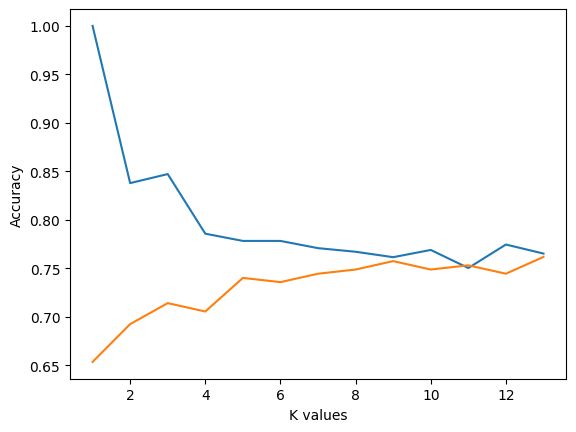

In [28]:
#here we can see the graph with respect to K value and our accuracy
plt.plot(range(1,14),train_acc,label="Training accuracy")
plt.plot(range(1,14),test_acc,label="Testing accuracy")
plt.xlabel("K values")
plt.ylabel("Accuracy")

#by the observation we take K value as 11 or 9 our choice


In [29]:
knn=KNeighborsClassifier(n_neighbors=9)
knn.fit(x_train,y_train)
print("the training accuracy is:",knn.score(x_train,y_train))

print("the testing accuraacy is:",knn.score(x_test,y_test))

the training accuracy is: 0.7616387337057728
the testing accuraacy is: 0.7575757575757576


In [30]:
#models number 2 decision trees
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(random_state=4,max_depth=4)
dt.fit(x_train,y_train)
print("the training accuracy is:",dt.score(x_train,y_train))

print("the testing accuraacy is:",dt.score(x_test,y_test))


the training accuracy is: 0.8156424581005587
the testing accuraacy is: 0.7662337662337663


In [31]:
#model number 3 neural network 
from sklearn.neural_network import MLPClassifier
mlp=MLPClassifier(random_state=42)
mlp.fit(x_train,y_train)
print("the training accuracy is:",mlp.score(x_train,y_train))
print("the testing accuraacy is:",mlp.score(x_test,y_test))


the training accuracy is: 0.7690875232774674
the testing accuraacy is: 0.7012987012987013


In [32]:
#until now we have observed 3 types of ML models 
#now we do some standard scaling and the work on some more moodels
#by using the normalization we may get more accuracy


In [33]:
#standard scaling/Normalization 
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train_scaled=sc.fit_transform(x_train)
x_test_scaled=sc.fit_transform(x_test)





In [34]:
#KNN model by using the scaled/normalized dataset
knn=KNeighborsClassifier(n_neighbors=9)
knn.fit(x_train_scaled,y_train)
print("the training accuracy is:",knn.score(x_train_scaled,y_train))

print("the testing accuraacy is:",knn.score(x_test_scaled,y_test))


the training accuracy is: 0.8026070763500931
the testing accuraacy is: 0.7445887445887446


In [36]:
#decision tree model by using the scaled/normalized dataset
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(random_state=4,max_depth=5)
dt.fit(x_train_scaled,y_train)
print("the training accuracy is:",dt.score(x_train_scaled,y_train))

print("the testing accuraacy is:",dt.score(x_test_scaled,y_test))


the training accuracy is: 0.8584729981378026
the testing accuraacy is: 0.7922077922077922


In [37]:
#model number 3 neural network after normalization 
from sklearn.neural_network import MLPClassifier
mlp=MLPClassifier(random_state=33)
mlp.fit(x_train_scaled,y_train)
print("the training accuracy is:",mlp.score(x_train_scaled,y_train))
print("the testing accuraacy is:",mlp.score(x_test_scaled,y_test))


the training accuracy is: 0.8286778398510242
the testing accuraacy is: 0.7835497835497836


C:\Users\siva kumar\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
